### Analysis of CycIF data from PTCL

In [1]:
# Import librarires
import pandas as pd
import numpy as np
import os
import seaborn as sns; sns.set(style="white", color_codes=True)
import matplotlib.pyplot as plt

# Create anndata and scanpy
import anndata as ad
import scanpy as sc

# Import custom functions
import wget

#### Import data

In [3]:
# Set working directory
# Laptop
WD = "/Users/aj/Dropbox (Partners HealthCare)/Data/Vignesh_Lymphoma_tma"
# HMS
#WD = "C:/Users/ajn16/Dropbox (Partners HealthCare)/Data/Vignesh_Lymphoma_tma"

os.chdir(WD)
data = pd.read_csv('data.csv', delimiter=',', index_col=0)
data_n = pd.read_csv('data_n.csv', delimiter=',', index_col=0)

#### Look at the head of data

In [5]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
ID,,,,,,,,,,,,,,,,,,,,,
1_1,583,86,110,2024,712,95,77,48,1326,175,...,36,208,956,227,43,34,633,173,23,75
1_2,956,118,224,2546,1084,150,103,67,1344,154,...,39,258,1253,271,44,35,1106,219,22,81
1_3,1129,110,137,1379,1408,132,91,53,1913,263,...,37,257,1515,229,41,34,1470,201,24,82
1_4,1046,181,307,1976,1082,168,126,72,1858,486,...,43,289,1693,374,48,36,1256,264,27,90
1_5,833,244,421,1191,1076,242,134,81,1261,249,...,51,333,1095,328,58,37,982,310,30,100


In [28]:
# Convert to AnnData 
adata = sc.AnnData(data)

In [29]:
# Clean data
sc.pp.filter_cells(adata, min_genes=52)
sc.pp.filter_genes(adata, min_cells=52)
adata.obs['n_counts'] = adata.X.sum(axis=1)

In [30]:
adata

AnnData object with n_obs × n_vars = 171304 × 52 
    obs: 'n_genes', 'n_counts'
    var: 'n_cells'

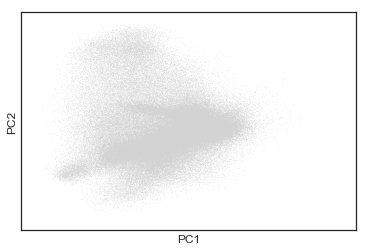

In [32]:
# Normalize data
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata)

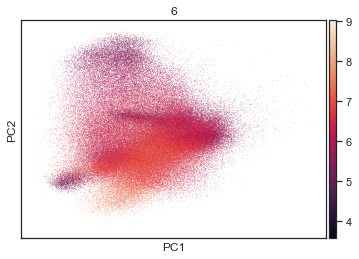

In [34]:
sc.pl.pca(adata, color='6')

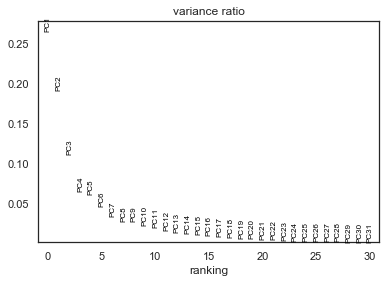

In [35]:
sc.pl.pca_variance_ratio(adata)

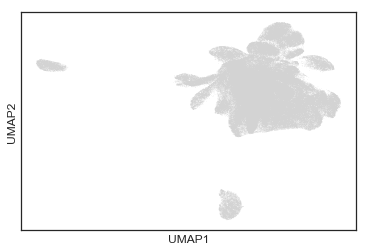

In [36]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=7)
sc.tl.umap(adata)
sc.pl.umap(adata)

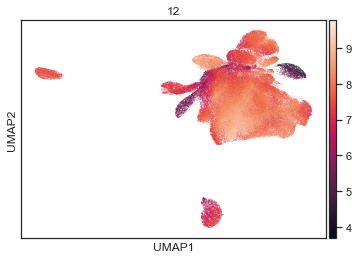

In [42]:
sc.pl.umap(adata,color='12')